In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

[2018-08-26 18:03:49,750] Making new env: LunarLander-v2


('State shape: ', (8,))
('Number of actions: ', 4)


In [3]:
from dqn_agent import dqn_Agent

In [4]:
agent = dqn_Agent(state_size=8, action_size=4, seed=0)

('shape', tensor([[0.0965, 0.0000, 0.0975, 0.0498],
        [0.0991, 0.0000, 0.0978, 0.0602],
        [0.0956, 0.0000, 0.0995, 0.0522],
        [0.1029, 0.0000, 0.0953, 0.0476],
        [0.0989, 0.0000, 0.0969, 0.0515],
        [0.1052, 0.0000, 0.0943, 0.0463],
        [0.1060, 0.0000, 0.0944, 0.0463],
        [0.1032, 0.0000, 0.0960, 0.0673],
        [0.1031, 0.0000, 0.1005, 0.0724],
        [0.0967, 0.0000, 0.0980, 0.0520],
        [0.1013, 0.0000, 0.0955, 0.0595],
        [0.0977, 0.0000, 0.0997, 0.0591],
        [0.0976, 0.0000, 0.1003, 0.0610],
        [0.1024, 0.0000, 0.0940, 0.0489],
        [0.1032, 0.0000, 0.0930, 0.0545],
        [0.1009, 0.0000, 0.0972, 0.0653],
        [0.1070, 0.0000, 0.0930, 0.0467],
        [0.1030, 0.0000, 0.0931, 0.0542],
        [0.0999, 0.0000, 0.0991, 0.0636],
        [0.0938, 0.0000, 0.0990, 0.0508],
        [0.1023, 0.0000, 0.0949, 0.0482],
        [0.0956, 0.0000, 0.1003, 0.0539],
        [0.0963, 0.0000, 0.0977, 0.0516],
        [0.1081, 0.0000,

('shape', tensor([[0.0000, 0.0000, 0.3161, 0.0000],
        [0.0000, 0.0000, 0.2117, 0.0343],
        [0.0000, 0.0000, 0.3362, 0.0000],
        [0.0000, 0.0000, 0.1741, 0.0593],
        [0.0000, 0.0000, 0.3902, 0.0000],
        [0.0000, 0.0000, 0.3079, 0.0000],
        [0.0000, 0.0000, 0.2357, 0.0216],
        [0.0000, 0.0000, 0.1956, 0.0446],
        [0.0000, 0.0000, 0.3423, 0.0000],
        [0.0000, 0.0000, 0.3495, 0.0000],
        [0.0000, 0.0000, 0.3147, 0.0000],
        [0.0000, 0.0000, 0.3422, 0.0000],
        [0.0000, 0.0000, 0.3245, 0.0000],
        [0.0000, 0.0000, 0.3514, 0.0000],
        [0.0000, 0.0000, 0.3185, 0.0000],
        [0.0000, 0.0000, 0.1899, 0.0489],
        [0.0000, 0.0000, 0.3305, 0.0000],
        [0.0000, 0.0000, 0.3321, 0.0000],
        [0.0000, 0.0000, 0.2653, 0.0056],
        [0.0000, 0.0000, 0.2710, 0.0000],
        [0.0000, 0.0000, 0.3410, 0.0000],
        [0.0000, 0.0000, 0.3933, 0.0000],
        [0.0000, 0.0000, 0.1804, 0.0545],
        [0.0000, 0.0000,

('shape', tensor([[0.0000, 0.0000, 0.4205, 0.0000],
        [0.0000, 0.0000, 0.3990, 0.0000],
        [0.0000, 0.0000, 0.4089, 0.0000],
        [0.0000, 0.0000, 0.3922, 0.0000],
        [0.0000, 0.0000, 0.4463, 0.0000],
        [0.0000, 0.0000, 0.3947, 0.0000],
        [0.0000, 0.0000, 0.2969, 0.0264],
        [0.0000, 0.0000, 0.3535, 0.0000],
        [0.0000, 0.0000, 0.2660, 0.0471],
        [0.0000, 0.0000, 0.3990, 0.0000],
        [0.0000, 0.0000, 0.3136, 0.0202],
        [0.0000, 0.0000, 0.4254, 0.0000],
        [0.0000, 0.0000, 0.4055, 0.0000],
        [0.0000, 0.0000, 0.3894, 0.0000],
        [0.0000, 0.0000, 0.3741, 0.0000],
        [0.0000, 0.0000, 0.3847, 0.0000],
        [0.0000, 0.0000, 0.3289, 0.0107],
        [0.0000, 0.0000, 0.1719, 0.0109],
        [0.0000, 0.0000, 0.2501, 0.0592],
        [0.0000, 0.0000, 0.4063, 0.0000],
        [0.0000, 0.0000, 0.2600, 0.0506],
        [0.0000, 0.0000, 0.3839, 0.0000],
        [0.0000, 0.0000, 0.4090, 0.0000],
        [0.0000, 0.0000,

('shape', tensor([[0.0000, 0.0000, 0.6368, 0.1288],
        [0.0000, 0.0000, 0.8433, 0.0073],
        [0.0000, 0.0000, 0.9133, 0.0000],
        [0.0000, 0.0000, 1.0276, 0.0000],
        [0.0000, 0.0000, 0.6321, 0.1311],
        [0.0000, 0.0000, 0.9393, 0.0000],
        [0.0000, 0.0000, 1.0210, 0.0000],
        [0.0000, 0.0000, 1.0412, 0.0000],
        [0.0000, 0.0000, 1.0201, 0.0000],
        [0.0000, 0.0000, 0.7487, 0.0609],
        [0.0000, 0.0000, 0.9684, 0.0000],
        [0.0000, 0.0000, 1.0088, 0.0000],
        [0.0000, 0.0000, 1.0735, 0.0000],
        [0.0000, 0.0000, 0.9840, 0.0000],
        [0.0000, 0.0000, 1.1503, 0.0000],
        [0.0000, 0.0000, 1.0127, 0.0000],
        [0.0000, 0.0000, 1.0515, 0.0000],
        [0.0000, 0.0000, 1.0572, 0.0000],
        [0.0000, 0.0000, 1.1327, 0.0000],
        [0.0000, 0.0000, 0.9129, 0.0000],
        [0.0000, 0.0000, 0.9295, 0.0000],
        [0.0000, 0.0000, 1.1371, 0.0000],
        [0.0000, 0.0000, 1.0390, 0.0000],
        [0.0000, 0.0000,

('shape', tensor([[0.0000, 0.0000, 1.2993, 0.0000],
        [0.0000, 0.0000, 1.1796, 0.0000],
        [0.0000, 0.0000, 1.5354, 0.0000],
        [0.0000, 0.0000, 1.3522, 0.0000],
        [0.0000, 0.0000, 1.5087, 0.0000],
        [0.0000, 0.0000, 1.4451, 0.0000],
        [0.0000, 0.0000, 1.5492, 0.0000],
        [0.0000, 0.0000, 0.8942, 0.1861],
        [0.0000, 0.0000, 1.3609, 0.0000],
        [0.0000, 0.0000, 1.1361, 0.0000],
        [0.0000, 0.0000, 1.2097, 0.0097],
        [0.0000, 0.0000, 1.2188, 0.0000],
        [0.0000, 0.0000, 0.9700, 0.1503],
        [0.0000, 0.0000, 1.2703, 0.0000],
        [0.0000, 0.0000, 1.1439, 0.0000],
        [0.0000, 0.0000, 1.1193, 0.0619],
        [0.0000, 0.0000, 0.9215, 0.1800],
        [0.0000, 0.0000, 1.4019, 0.0000],
        [0.0000, 0.0000, 1.1687, 0.0280],
        [0.0000, 0.0000, 1.2384, 0.0000],
        [0.0000, 0.0000, 1.2423, 0.0000],
        [0.0000, 0.0000, 1.1183, 0.0000],
        [0.0000, 0.0000, 1.1258, 0.0000],
        [0.0000, 0.0000,

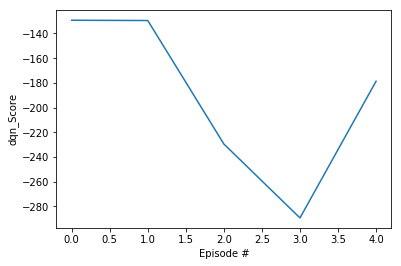

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


NameError: name 'ddqn_scores_mean_w' is not defined

In [5]:
def ddqn(n_episodes=2500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores_mean_w=[]
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
   
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        
 #       print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
 #       somme=agent.wQ1+agent.wQ2+0.0000001
 #       print("qQ1=",agent.wQ1/somme," qQ2=",agent.wQ2/somme)
 #       print()
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 10 == 0:            
            scores_mean_w.append(np.mean(scores_window))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_Qa.state_dict(), 'ddqn_checkpoint_test_a.pth')
            torch.save(agent.qnetwork_Qb.state_dict(), 'ddqn_checkpoint_test_b.pth')            
            break
    return scores,scores_mean_w

ddqn_scores,ddqn_scores_mean_w = ddqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores)
plt.ylabel('ddqn_Score')
plt.xlabel('Episode #')
plt.show()

ax = fig.add_subplot(111)
plt.plot(np.arange(len(ddqn_scores_mean_w))*10, ddqn_scores_mean_w)
plt.ylabel('Sddqn_core mean over 100 every 10')
plt.xlabel('Episode #')
plt.show()

